In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### **reading dataset**

In [3]:
data=pd.read_csv('C:/Users/e-gul/Downloads/Compressed/Safe-Password-main/Safe-Password-main/data.csv',on_bad_lines='skip')
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

#### code to check all the missing values in my dataset

In [5]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [6]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

password    0
strength    0
dtype: int64

<Axes: ylabel='count'>

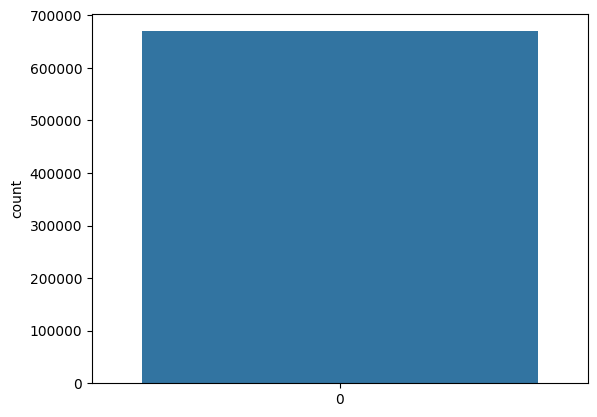

In [9]:
sns.countplot(data['strength'])

In [10]:
password_tuple=np.array(data)

In [11]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

#### **shuffling randomly for robustness**

In [12]:
import random
random.shuffle(password_tuple)

In [13]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


#### **create a custom function to split input into characters of list**

In [14]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [15]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

#### **import TF-IDF vectorizer to convert String data into numerical data**

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

#### **apply TF-IDF vectorizer on data**

In [18]:
X=vectorizer.fit_transform(x)

In [19]:
X.shape

(669639, 125)

In [20]:
vectorizer.get_feature_names_out()

array(['\x01', '\x05', '\x08', '\x10', '\x12', '\x16', '\x17', '\x19',
       '\x1b', '\x1c', '\x1e', ' ', '!', '"', '#', '$', '%', '&', '(',
       ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^',
       '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
       'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
       'y', 'z', '{', '|', '}', '~', '\x7f', '\x81', '¡', '¤', '¨', '«',
       '¯', '°', '±', '²', '³', '´', 'µ', '·', 'º', '¾', '¿', '×', 'ß',
       'à', 'á', 'â', 'ä', 'å', 'æ', 'ç', 'ê', 'í', 'ð', 'ñ', 'ò', 'ó',
       'ô', 'õ', 'ö', '÷', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', 'œ', '—', '‚',
       '‹', '›', '™'], dtype=object)

In [21]:
first_document_vector=X[0]
first_document_vector

<1x125 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [22]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56753224],
        [0.        ],
        [0.59084545],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [23]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names_out(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.590845
5,0.567532
z,0.336113
k,0.291985
d,0.285660
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


#### **split data into train & test**
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [26]:
X_train.shape

(535711, 125)

In [27]:
from sklearn.linear_model import LogisticRegression

#### **apply Logistic on data as use-cas is Classification**

In [28]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [29]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

#### **doing prediction for specific custom data**

In [36]:
passwordCheck = input("Enter Password to check Strength: ")

dt=np.array([passwordCheck])
pred=vectorizer.transform(dt)
x = clf.predict(pred)
if x[0] == 0:
  print("Your Password is Weak.")
elif x[0] == 1:
  print("Your Password is Strong.")
else:
  print("Your Password is Very Strong.")
  

Your Password is Weak.


#### **doing prediction on X-Test data**

In [37]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

#### **check Accuracy of your model using confusion_matrix,accuracy_score**

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [39]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 5241 12673    13]
 [ 3746 93241  2523]
 [   43  5199 11249]]
0.8193282958007287


##### **create report of your model**

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39     17927
           1       0.84      0.94      0.89     99510
           2       0.82      0.68      0.74     16491

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

